In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../src')
from data.audio_dataset import AudioSpectrogramDataset
import soundfile as sf


In [31]:
dataset = AudioSpectrogramDataset(base_directory="../data/raw/Bass", spectro_type='mel')
item0 = dataset.__getitem__(0)
item1 = dataset.__getitem__(1)
item2 = dataset.__getitem__(2)

In [32]:
print(item0.shape)
print(item1.shape)
print(item2.shape)

torch.Size([1, 256, 160])
torch.Size([1, 256, 160])
torch.Size([1, 256, 160])


In [33]:
DataSize = dataset.get_data_size()
print(DataSize)

torch.Size([1, 256, 160])


In [34]:
from torch.utils.data import DataLoader

batch_size = 16

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [35]:
for i, spectro in enumerate(dataloader):
    print(f'i: {i}, spectro: {spectro.shape}')
    if(i>10): break

i: 0, spectro: torch.Size([16, 1, 256, 160])
i: 1, spectro: torch.Size([16, 1, 256, 160])
i: 2, spectro: torch.Size([16, 1, 256, 160])
i: 3, spectro: torch.Size([16, 1, 256, 160])
i: 4, spectro: torch.Size([16, 1, 256, 160])
i: 5, spectro: torch.Size([16, 1, 256, 160])
i: 6, spectro: torch.Size([16, 1, 256, 160])
i: 7, spectro: torch.Size([16, 1, 256, 160])
i: 8, spectro: torch.Size([16, 1, 256, 160])
i: 9, spectro: torch.Size([16, 1, 256, 160])
i: 10, spectro: torch.Size([16, 1, 256, 160])
i: 11, spectro: torch.Size([16, 1, 256, 160])


In [1]:
import matplotlib.pyplot as plt
import librosa
from torchvision.transforms import ToTensor
import numpy as np
from IPython.display import Audio 

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
Audio("../data/raw/Single-bass/bass_electronic_018-026-127.wav")

In [37]:
def draw_spectro(spectro, name="Mel-Spectrogram (dB)"):
    mel_spectro = np.abs(spectro)
    power_to_db = librosa.power_to_db(mel_spectro, ref=np.max)
    plt.figure(figsize=(8, 7))
    librosa.display.specshow(power_to_db, sr=22050, x_axis='time', y_axis='mel', cmap='magma', 
    hop_length=512)
    plt.colorbar(label='dB')
    plt.title(name, fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Frequency', fontdict=dict(size=15))
    plt.show()

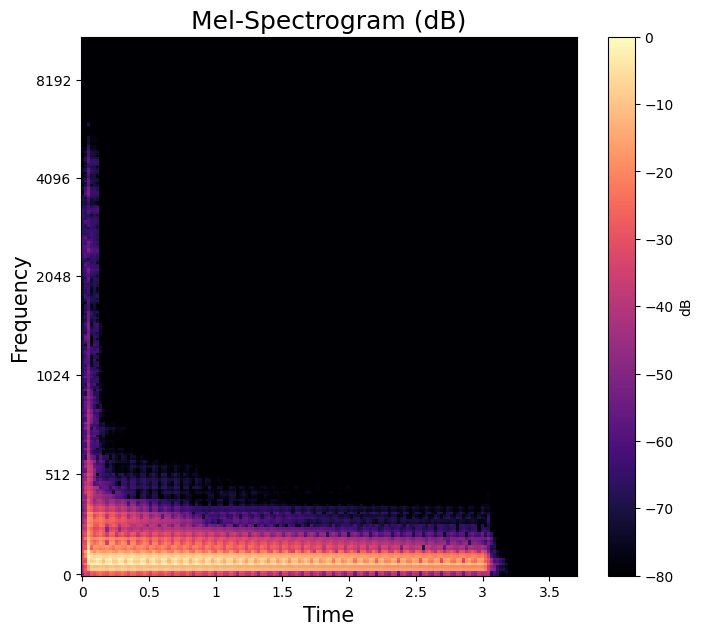

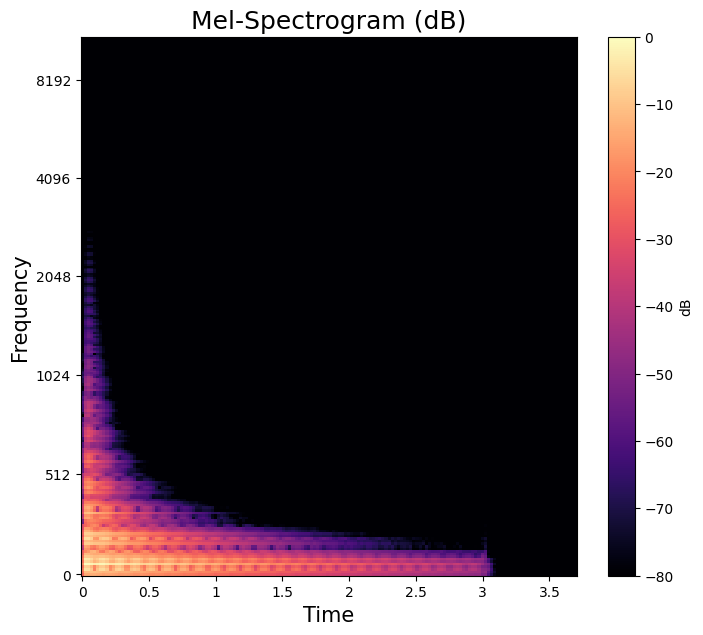

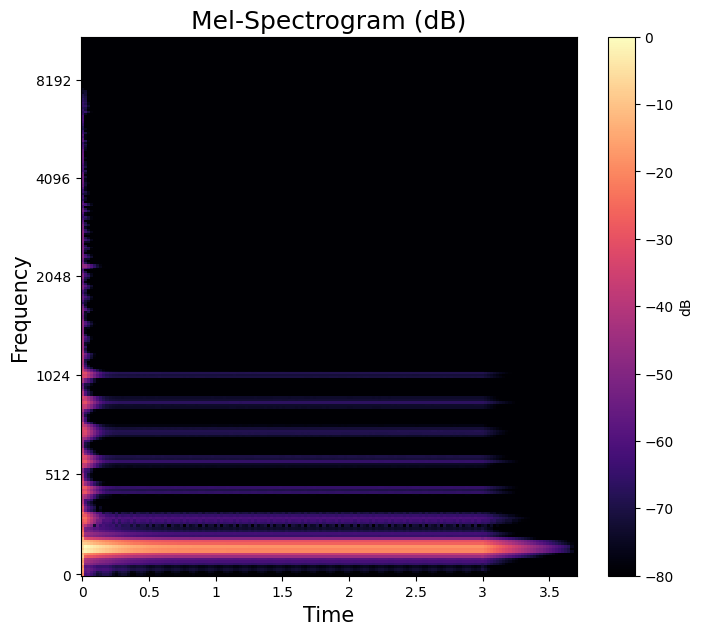

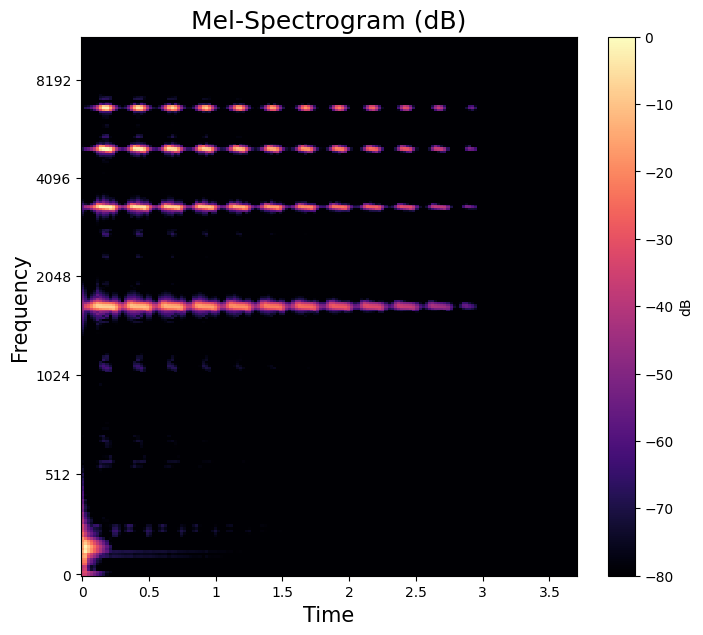

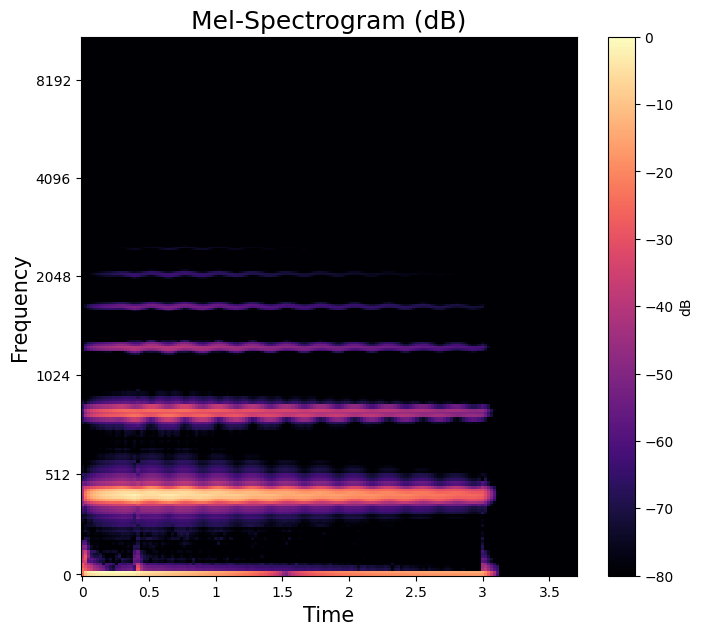

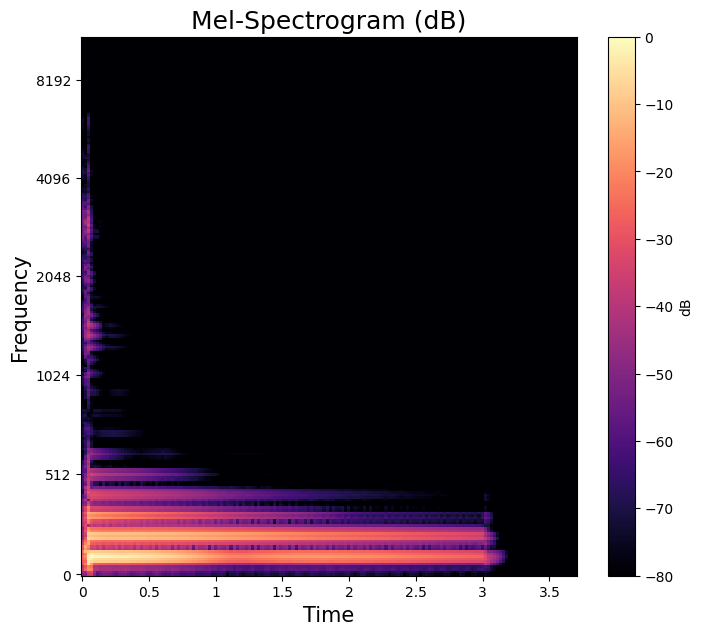

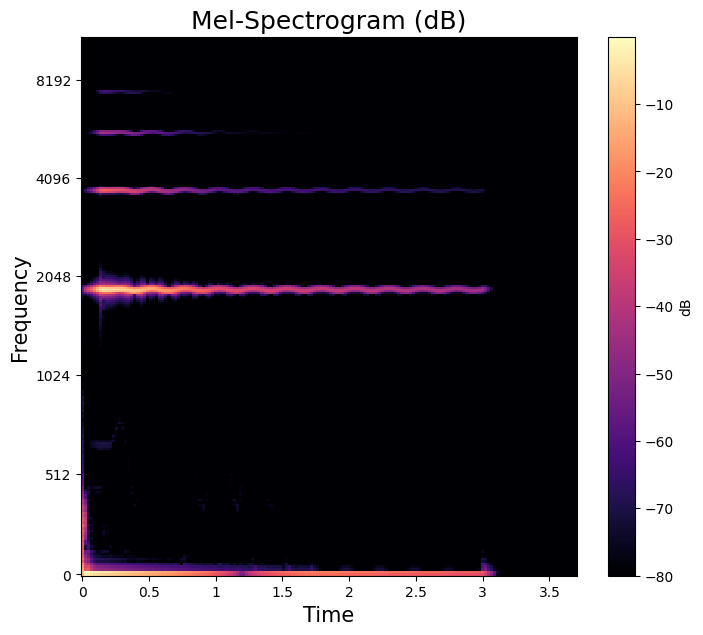

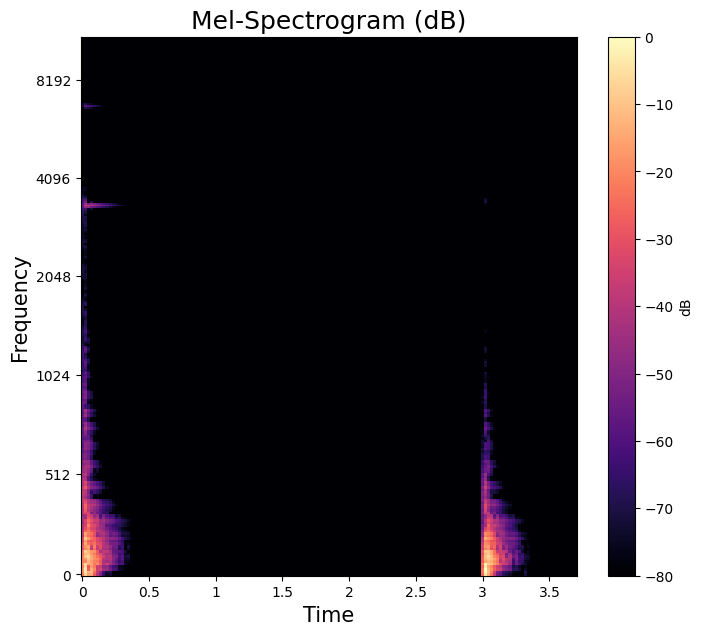

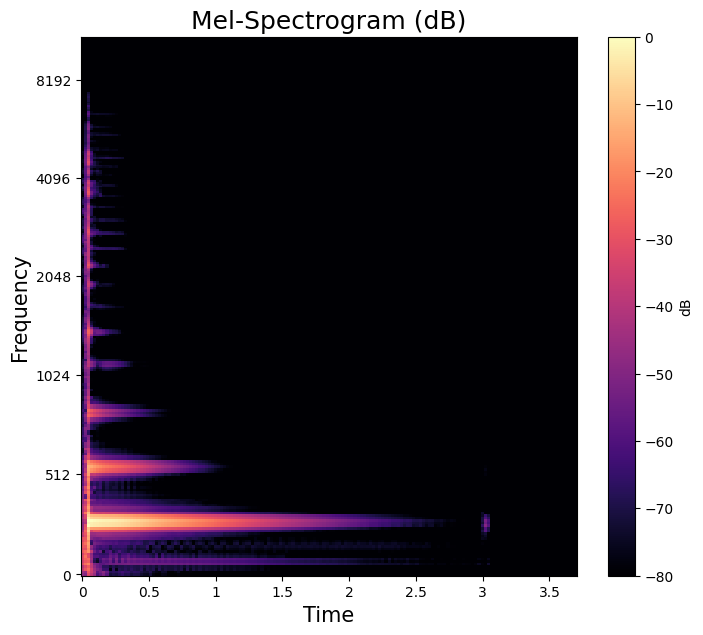

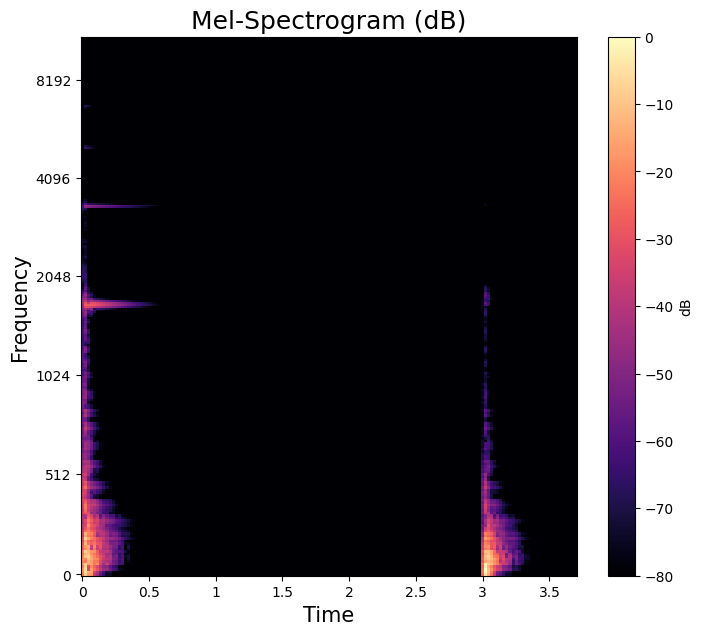

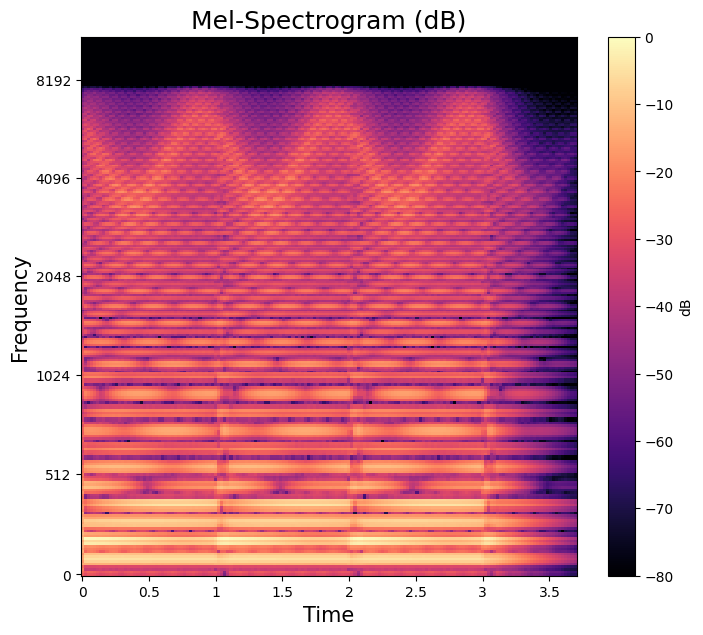

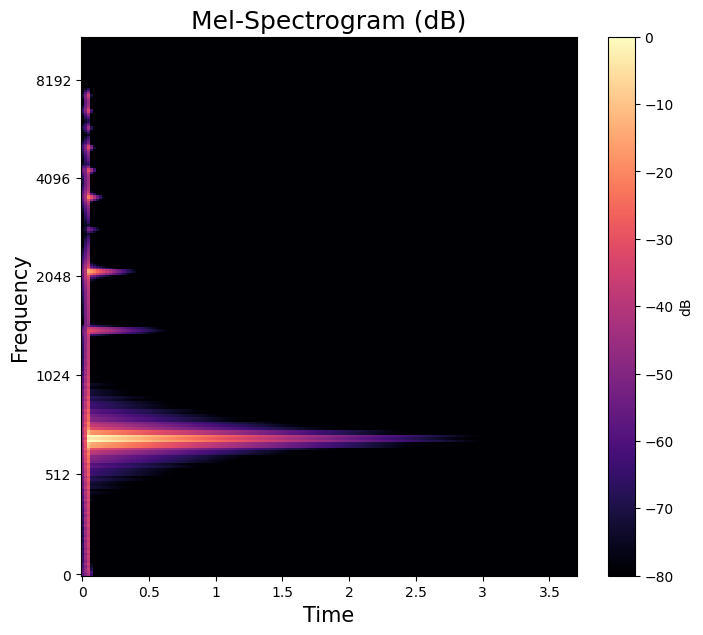

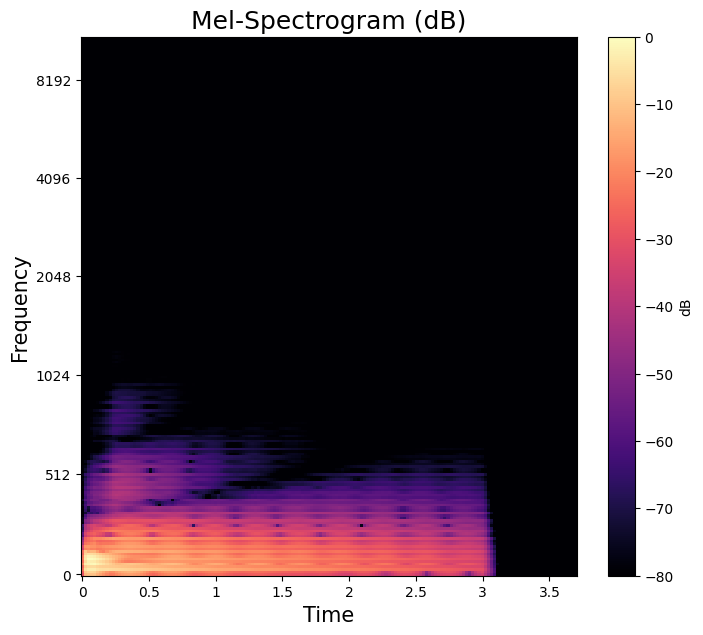

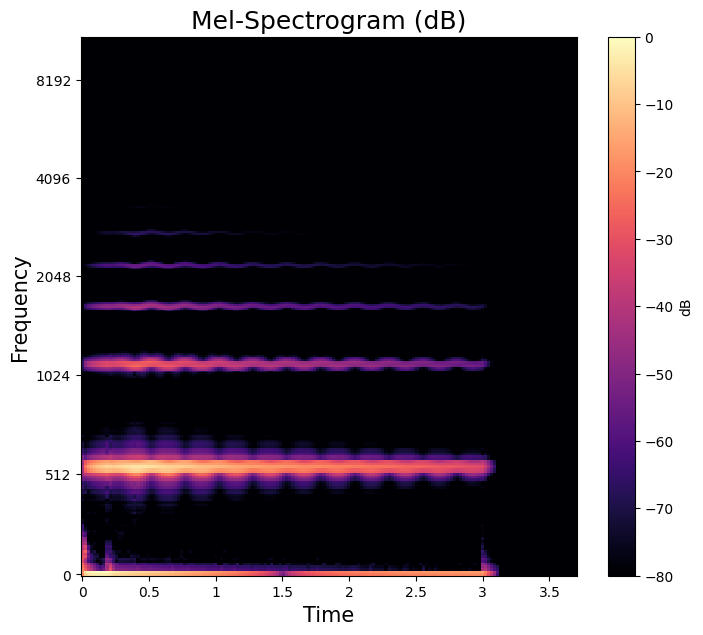

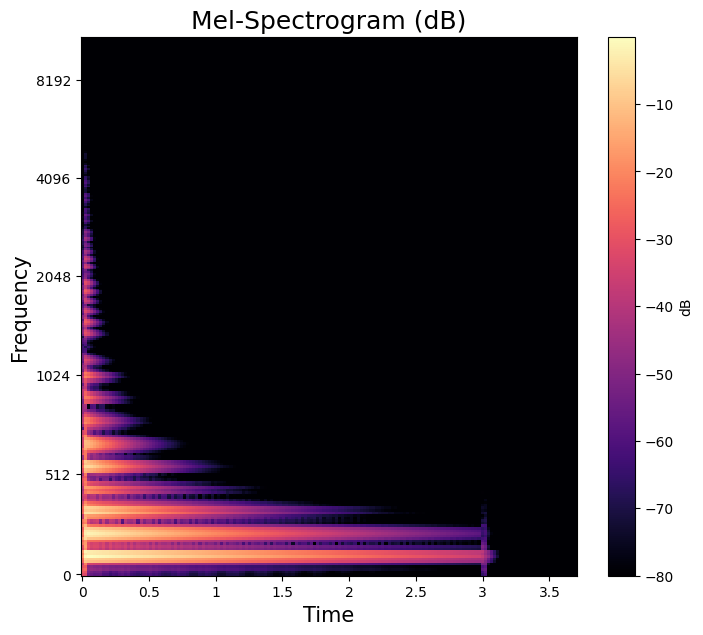

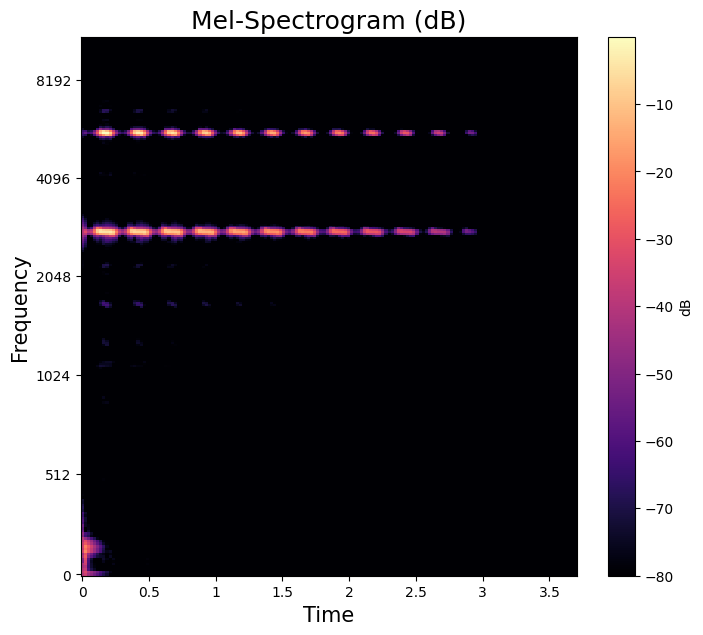

In [38]:
for s in spectro:
    # print(s.squeeze(0).shape)
    draw_spectro(s.squeeze(0))

In [8]:
import matplotlib.pyplot as plt
import librosa

plt.figure(figsize=(10, 5))

img = librosa.display.specshow(spectro, x_axis='time', y_axis='log')
plt.title('WGAN_generated_spectrogram', fontsize=20)
plt.colorbar(img, format='%0.2f')

plt.show()

TypeError: Cannot interpret 'torch.float32' as a data type

<Figure size 1000x500 with 0 Axes>

In [30]:
audio = dataset.pipeline.post_process(item0)
name = f'new_librosa-{dataset.spectro_type}.wav'

path = '../models/generated_samples/'
path = path + name

sf.write(path, audio, 22050, subtype='PCM_24')

(1, 88064)


LibsndfileError: Error opening 'new_librosa-mel.wav': Format not recognised.